#Function

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
import os

import warnings


warnings.filterwarnings('ignore')
def display_images_horizontal(df, column_name,access):
    unique_values = df[column_name].unique()
    num_images = len(unique_values)

    fig, axes = plt.subplots(1, num_images, figsize=(5 * num_images, 5), squeeze=False)
    axes = axes.flatten()

    for i, value in enumerate(unique_values):
        subset = df[df[column_name] == value]
        if not subset.empty:
            img_url = subset.iloc[0][access]  # Ambil URL gambar pertama yang cocok
            img = mpimg.imread(img_url)

            axes[i].imshow(img)
            axes[i].set_title(f'{column_name}: {value}')
            axes[i].axis('off')  # Menyembunyikan axis

    plt.tight_layout()
    plt.show()

def plot_kelas_distributions(train_df, val_df, column_name):
    """
    Plot jumlah dan persentase data untuk kategori di train_df dan val_df.

    Parameters:
    - train_df: DataFrame untuk data pelatihan.
    - val_df: DataFrame untuk data validasi.
    - column_name: Nama kolom yang digunakan untuk kategori.
    """
    # Hitung jumlah data untuk setiap kategori di setiap DataFrame
    def count_kelas(df, kelas):
        return df[df[column_name] == kelas].shape[0]

    categories = train_df[column_name].unique()

    # Hitung jumlah data untuk setiap kategori di train_df dan val_df
    train_counts = [count_kelas(train_df, kelas) for kelas in categories]
    val_counts = [count_kelas(val_df, kelas) for kelas in categories]

    # Total data untuk setiap kategori di semua DataFrames
    total_counts = [train_counts[i] + val_counts[i] for i in range(len(categories))]

    # Hitung persentase untuk setiap DataFrame
    train_percentages = [count / total * 100 for count, total in zip(train_counts, total_counts)]
    val_percentages = [count / total * 100 for count, total in zip(val_counts, total_counts)]

    # Data untuk plot
    x_labels = categories
    index = range(len(categories))

    # Plotting
    fig, ax = plt.subplots(figsize=(14, 7))

    bar_width = 0.25
    bar1 = ax.bar([i - bar_width for i in index], train_counts, bar_width, label='Train_NoAug')
    bar2 = ax.bar(index, val_counts, bar_width, label='Validation_NoAug')

    # Menambahkan persentase ke setiap bar
    def autolabel(bars, percentages):
        for bar, percentage in zip(bars, percentages):
            height = bar.get_height()
            ax.annotate(f'{height}\n({percentage:.1f}%)',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(bar1, train_percentages)
    autolabel(bar2, val_percentages)

    ax.set_xlabel(column_name)
    ax.set_ylabel('Jumlah Data')
    ax.set_title(f'Jumlah Data dan Persentase untuk Setiap {column_name}')
    ax.set_xticks(index)
    ax.set_xticklabels(x_labels)
    ax.legend()

    plt.tight_layout()
    plt.show()

    # Print summary
    print(f"{column_name:<10} | {'Train':>10} | {'Validation':>12} ")
    print('-' * 42)

    # Print data
    for i, kelas in enumerate(categories):
        print(f"{kelas:<10} | {train_counts[i]:>10} ({train_percentages[i]:>6.1f}%) | "
              f"{val_counts[i]:>12} ({val_percentages[i]:>6.1f}%)")


import os
def create_directory_if_not_exists(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        print(f"Direktori '{directory}'\n berhasil dibuat.")
    else:
        print(f"Direktori '{directory}'\n sudah ada.")
base_path = '/content/drive/MyDrive/Skripsi_Isa Tarmana M_10120544/Program/'
data_path = base_path + 'data/'
create_directory_if_not_exists(base_path)
create_directory_if_not_exists(data_path)

Direktori '/content/drive/MyDrive/Skripsi_Isa Tarmana M_10120544/Program/'
 sudah ada.
Direktori '/content/drive/MyDrive/Skripsi_Isa Tarmana M_10120544/Program/data/'
 sudah ada.


In [ ]:
def plot_kelas_leakage_distributions(clear_df, leakage_df, column_name):
    """
    Plot jumlah dan persentase data untuk kategori di clear_df dan leakage_df.

    Parameters:
    - clear_df: DataFrame untuk data pelatihan.
    - leakage_df: DataFrame untuk data validasi.
    - column_name: Nama kolom yang digunakan untuk kategori.
    """
    # Hitung jumlah data untuk setiap kategori di setiap DataFrame
    def count_kelas(df, kelas):
        return df[df[column_name] == kelas].shape[0]

    categories = clear_df[column_name].unique()

    # Hitung jumlah data untuk setiap kategori di clear_df dan leakage_df
    clear_counts = [count_kelas(clear_df, kelas) for kelas in categories]
    val_counts = [count_kelas(leakage_df, kelas) for kelas in categories]

    # Total data untuk setiap kategori di semua DataFrames
    total_counts = [clear_counts[i] + val_counts[i] for i in range(len(categories))]

    # Hitung persentase untuk setiap DataFrame
    clear_percentages = [count / total * 100 for count, total in zip(clear_counts, total_counts)]
    val_percentages = [count / total * 100 for count, total in zip(val_counts, total_counts)]

    # Data untuk plot
    x_labels = categories
    index = range(len(categories))

    # Plotting
    fig, ax = plt.subplots(figsize=(14, 7))

    bar_width = 0.25
    bar1 = ax.bar([i - bar_width for i in index], clear_counts, bar_width, label='Clear')
    bar2 = ax.bar(index, val_counts, bar_width, label='Leakage Data')

    # Menambahkan persentase ke setiap bar
    def autolabel(bars, percentages):
        for bar, percentage in zip(bars, percentages):
            height = bar.get_height()
            ax.annotate(f'{height}\n({percentage:.1f}%)',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(bar1, clear_percentages)
    autolabel(bar2, val_percentages)

    ax.set_xlabel(column_name)
    ax.set_ylabel('Jumlah Data')
    ax.set_title(f'Jumlah Data dan Persentase untuk Setiap {column_name}')
    ax.set_xticks(index)
    ax.set_xticklabels(x_labels)
    ax.legend()

    plt.tight_layout()
    plt.show()

    # Print summary
    print(f"{column_name:<10} | {'clear':>10} | {'Leakage':>12} ")
    print('-' * 42)

    # Print data
    for i, kelas in enumerate(categories):
        print(f"{kelas:<10} | {clear_counts[i]:>10} ({clear_percentages[i]:>6.1f}%) | "
              f"{val_counts[i]:>12} ({val_percentages[i]:>6.1f}%)")


#Load Data

In [ ]:

import pandas as pd
import tensorflow as tf
print('Versi Tensorflow :',tf.__version__)

Versi Tensorflow : 2.17.0


In [ ]:
import os
def create_directory_if_not_exists(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        print(f"Direktori '{directory}'\n berhasil dibuat.")
    else:
        print(f"Direktori '{directory}'\n sudah ada.")
base_path = '/content/drive/MyDrive/Skripsi_Isa Tarmana M_10120544/Program/'
data_path = base_path + 'data/'
create_directory_if_not_exists(base_path)
create_directory_if_not_exists(data_path)

Direktori '/content/drive/MyDrive/Skripsi_Isa Tarmana M_10120544/Program/'
 sudah ada.
Direktori '/content/drive/MyDrive/Skripsi_Isa Tarmana M_10120544/Program/data/'
 sudah ada.


# Definisikan Riset

In [ ]:
name_research = 'Leakage Condition Grade'
skenario = 'Grade'
Data = 'IDG'
name_model = 'fine_tuned_Resnet50V2'
setting ='rl(0.5 per 4)_opt[Adamax]'

#Gambar
channels = 3
size_img = (216,324)
shape_img = (size_img[0],size_img[1], channels)

# Data
# train_df = pd.read_csv(data_path+f'{Data}/Aug{Data}_train_df_{skenario}.csv')
# val_df = pd.read_csv(data_path+f'val_{skenario}_NoAug.csv')

# train_df = pd.read_csv(data_path+f'{Data}/Aug{Data}_train_df_{skenario}.csv')
# val_df = pd.read_csv(data_path+f'{Data}/Aug{Data}_val_df_{skenario}.csv')

train_df = pd.read_csv(data_path+f'Augment&split/{Data}/Augment&split_Aug_{Data}_train_df_{skenario}.csv')
val_df = pd.read_csv(data_path+f'Augment&split/{Data}/Augment&split_Aug_{Data}_val_df_{skenario}.csv')
# Assuming aug1_df and aug2_df have the same columns

#Train Model
epoch_n = 30
count_patience = 10
lr_patience = 5
lr_factor = 0.2
test_df = val_df

research =f'{name_research}_{skenario}_{Data}_{name_model}_{setting}'

print(f'datetime : {pd.Timestamp.now()}')
print('[!] Riset dimulai')
print(research)

research_folder = base_path + f'{name_research}/'
create_directory_if_not_exists(research_folder)

datetime : 2024-09-05 04:14:54.615916
[!] Riset dimulai
Leakage Condition Grade_Grade_IDG_fine_tuned_Resnet50V2_rl(0.5 per 4)_opt[Adamax]
Direktori '/content/drive/MyDrive/Skripsi_Isa Tarmana M_10120544/Program/Leakage Condition Grade/'
 sudah ada.


# Data

## View Data

Skenario Grade Masked:


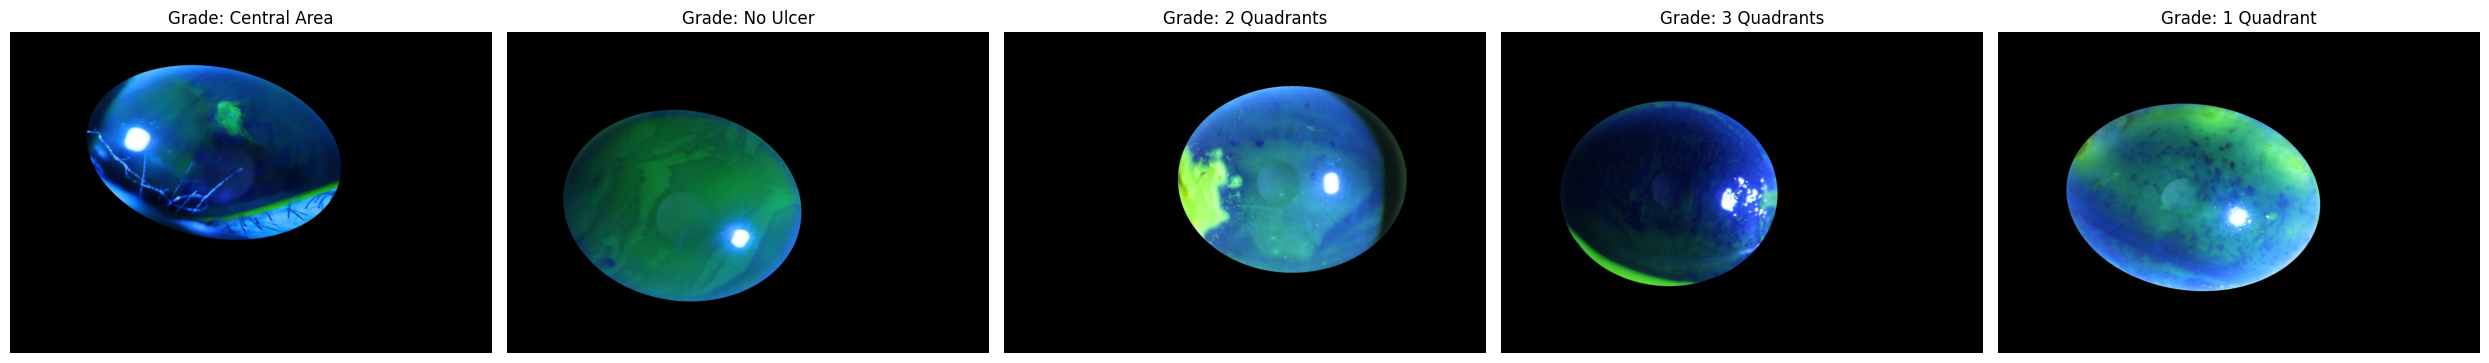

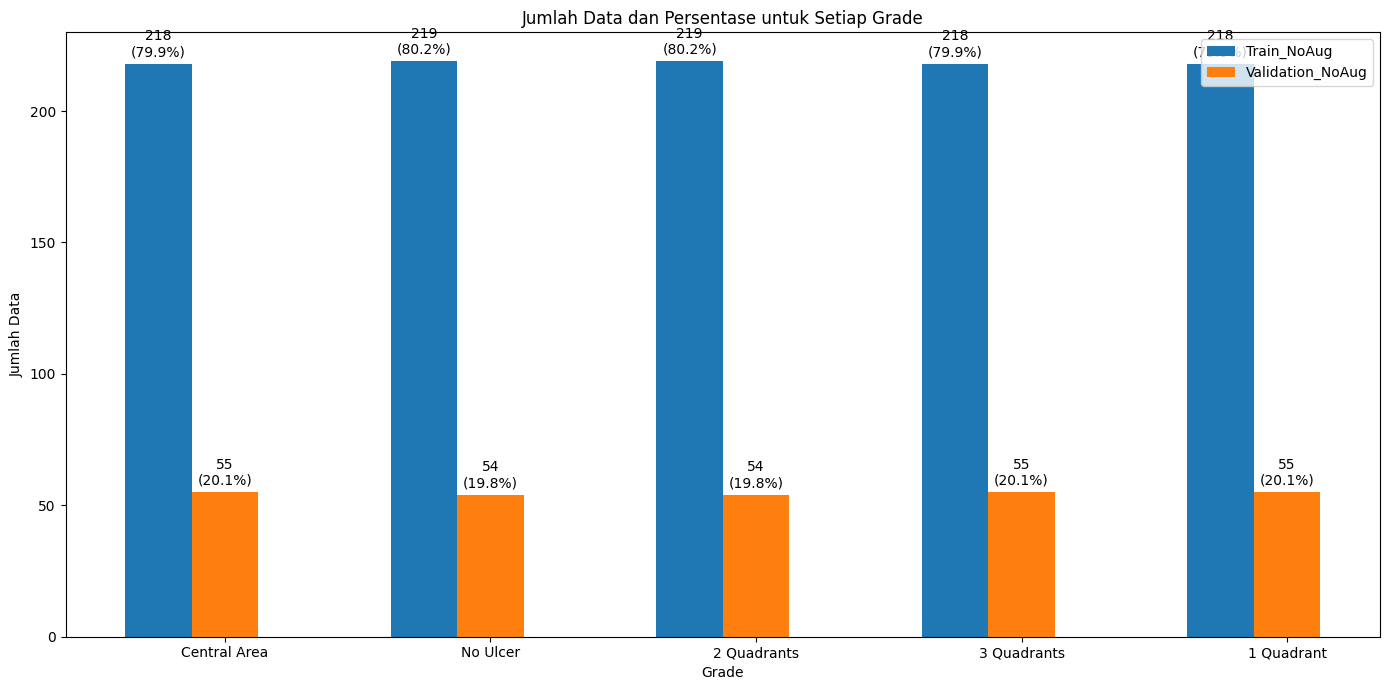

Grade      |      Train |   Validation 
------------------------------------------
Central Area |        218 (  79.9%) |           55 (  20.1%)
No Ulcer   |        219 (  80.2%) |           54 (  19.8%)
2 Quadrants |        219 (  80.2%) |           54 (  19.8%)
3 Quadrants |        218 (  79.9%) |           55 (  20.1%)
1 Quadrant |        218 (  79.9%) |           55 (  20.1%)


In [ ]:
print(f'Skenario {skenario} Masked:')
display_images_horizontal(train_df, f'{skenario}','Url')
plot_kelas_distributions(train_df, val_df, f'{skenario}')

In [ ]:
print('Train Data')
print('Jumlah Data :',train_df[skenario].shape[0])
display(train_df.head())
print('Validation & Test Data')
print('Jumlah Data :',val_df[skenario].shape[0])
display(val_df.head())

Train Data
Jumlah Data : 1092


,name,Grade,Url
0,704-masked,Central Area,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...
1,75-masked,No Ulcer,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...
2,706-masked.jpg,Central Area,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...
3,390-masked.jpg,2 Quadrants,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...
4,698-masked,Central Area,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...


Validation & Test Data
Jumlah Data : 273


,name,Grade,Url
0,649-masked,Central Area,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...
1,205-masked.jpg,No Ulcer,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...
2,431-masked.jpg,1 Quadrant,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...
3,648-masked.jpg,Central Area,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...
4,525-masked.jpg,3 Quadrants,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...


In [ ]:
train_df['name'] = train_df['name'].str.replace('.jpg', '', regex=False)
val_df['name'] = val_df['name'].str.replace('.jpg', '', regex=False)


## Kebocoran data

## Mengambil data gambar asli yang leakage pada data latih dan validasi

In [ ]:
unique_train_names = train_df['name'].unique()
unique_val_names = val_df['name'].unique()
# Buat DataFrame dari nilai unik
unique_train_df = pd.DataFrame(unique_train_names, columns=['name'])
unique_val_df = pd.DataFrame(unique_val_names, columns=['name'])

print(f'Jumlah data unique train : {unique_train_df.shape[0]}')
print(f'Jumlah data unique val : {unique_val_df.shape[0]}')
print(f'Total data : {unique_train_df.shape[0]+unique_val_df.shape[0]}')

Jumlah data unique train : 623
Jumlah data unique val : 228
Total data : 851


In [ ]:
leakage_df = pd.merge(unique_train_df, unique_val_df, on='name')
leakage_names = leakage_df['name'].unique()
print(f'Jumlah data leakage : {leakage_df.shape[0]}')
print('Nama data yang terindikasi leakage')
print(leakage_names)

Jumlah data leakage : 139
Nama data yang terindikasi leakage
['75-masked' '644-masked' '671-masked' '91-masked' '324-masked'
 '165-masked' '280-masked' '9-masked' '353-masked' '674-masked'
 '652-masked' '307-masked' '92-masked' '672-masked' '551-masked'
 '51-masked' '321-masked' '703-masked' '490-masked' '711-masked'
 '554-masked' '658-masked' '12-masked' '272-masked' '263-masked'
 '322-masked' '56-masked' '343-masked' '395-masked' '338-masked'
 '367-masked' '514-masked' '466-masked' '36-masked' '401-masked'
 '193-masked' '638-masked' '311-masked' '87-masked' '180-masked'
 '89-masked' '297-masked' '364-masked' '620-masked' '163-masked'
 '227-masked' '583-masked' '650-masked' '484-masked' '380-masked'
 '205-masked' '629-masked' '44-masked' '184-masked' '160-masked'
 '179-masked' '313-masked' '360-masked' '684-masked' '442-masked'
 '654-masked' '295-masked' '431-masked' '60-masked' '281-masked'
 '511-masked' '196-masked' '330-masked' '691-masked' '649-masked'
 '614-masked' '175-masked' '

## Data yang leakage dikeduanya

In [ ]:
leakage_train_df = train_df[train_df['name'].isin(leakage_names)]
print(f'Jumlah data leakage train : {leakage_train_df.shape[0]}({(leakage_train_df.shape[0]/train_df.shape[0]*100):.2f} %)')
display(leakage_train_df.head())

Jumlah data leakage train : 327(29.95 %)


,name,Grade,Url
1,75-masked,No Ulcer,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...
6,644-masked,Central Area,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...
20,671-masked,Central Area,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...
21,91-masked,No Ulcer,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...
22,324-masked,No Ulcer,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...


In [ ]:
leakage_val_df = val_df[val_df['name'].isin(leakage_names)]
print(f'Jumlah data leakage val : {leakage_val_df.shape[0]}({(leakage_val_df.shape[0]/val_df.shape[0]*100):.2f} %)')
display(leakage_val_df.head())

Jumlah data leakage val : 176(64.47 %)


,name,Grade,Url
0,649-masked,Central Area,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...
1,205-masked,No Ulcer,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...
2,431-masked,1 Quadrant,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...
3,648-masked,Central Area,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...
5,622-masked,Central Area,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...


## Menampilkan hasil leakage

In [ ]:
leakage_val_df[skenario].value_counts()

,count
Grade,
No Ulcer,54
1 Quadrant,50
Central Area,48
2 Quadrants,24


<Figure size 1000x600 with 0 Axes>

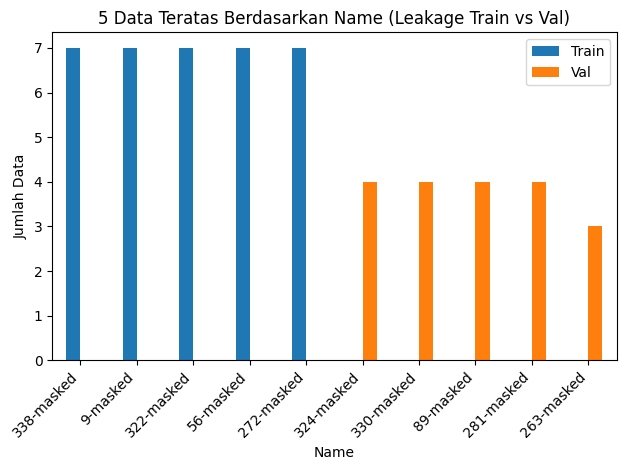

In [ ]:
# Hitung banyaknya data untuk setiap 'name' pada leakage_train_df
train_name_counts = leakage_train_df['name'].value_counts()

# Ambil 5 teratas pada leakage_train_df
top_5_train_counts = train_name_counts.head()

# Hitung banyaknya data untuk setiap 'name' pada leakage_val_df
val_name_counts = leakage_val_df['name'].value_counts()

# Ambil 5 teratas pada leakage_val_df
top_5_val_counts = val_name_counts.head()

# Gabungkan kedua Series untuk memastikan semua nama ada di kedua Series
combined_counts = pd.concat([top_5_train_counts, top_5_val_counts], axis=1).fillna(0)

# Buat diagram batang
plt.figure(figsize=(10, 6))
combined_counts.plot(kind='bar')
plt.title('5 Data Teratas Berdasarkan Name (Leakage Train vs Val)')
plt.xlabel('Name')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45, ha='right')
plt.legend(['Train', 'Val'])
plt.tight_layout()
plt.show()

Data leakage 163-masked
Pada Train:


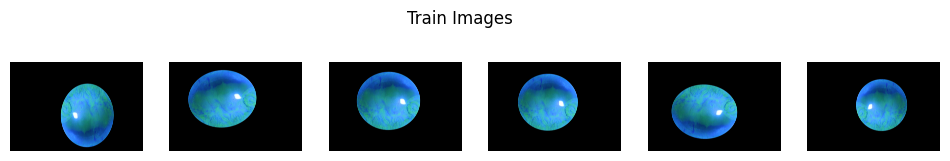


Pada Validation:


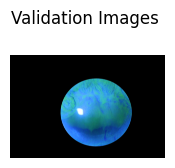

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Daftar nama bocor
nama_data_leakage = random.choice(leakage_names)

# Pilih salah satu nama bocor yang ingin ditampilkan

# Filter data leakage_val_df dan leakage_train_df berdasarkan nama bocor
filtered_val_df = leakage_val_df[leakage_val_df['name'] == nama_data_leakage]
filtered_train_df = leakage_train_df[leakage_train_df['name'] == nama_data_leakage]

# Fungsi untuk menampilkan gambar secara horizontal
def display_images_horizontal(df, title):
    num_images = len(df)
    if num_images == 0:
        return

    fig, axes = plt.subplots(1, num_images, figsize=(num_images * 2, 2))  # Adjust figsize as needed
    if num_images == 1:
        axes = [axes]

    for ax, (_, row) in zip(axes, df.iterrows()):
        img = mpimg.imread(row['Url'])
        ax.imshow(img)
        ax.axis('off')

    plt.suptitle(title)
    plt.show()

# Tampilkan gambar dari path lokal
print(f"Data leakage {nama_data_leakage}")

print("Pada Train:")
display_images_horizontal(filtered_train_df, 'Train Images')

print("\nPada Validation:")
display_images_horizontal(filtered_val_df, 'Validation Images')


## Data yang tidak Leakage

In [ ]:
clear_train_df = train_df[~train_df['name'].isin(leakage_names)]
print(f'Jumlah data clear train : {clear_train_df.shape[0]}({(clear_train_df.shape[0]/train_df.shape[0]*100):.2f} %)')
display(clear_train_df.head())

Jumlah data clear train : 765(70.05 %)


,name,Grade,Url
0,704-masked,Central Area,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...
2,706-masked,Central Area,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...
3,390-masked,2 Quadrants,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...
4,698-masked,Central Area,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...
5,13-masked,3 Quadrants,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...


In [ ]:
clear_val_df = val_df[~val_df['name'].isin(leakage_names)]
print(f'Jumlah data clear val : {clear_val_df.shape[0]}({(clear_val_df.shape[0]/val_df.shape[0]*100):.2f} %)')
display(clear_val_df.head())

Jumlah data clear val : 97(35.53 %)


,name,Grade,Url
4,525-masked,3 Quadrants,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...
8,325-masked,3 Quadrants,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...
12,670-masked,Central Area,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...
13,572-masked,2 Quadrants,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...
19,587-masked,2 Quadrants,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...


## Result

Leakage and clear data validation Grade Masked:


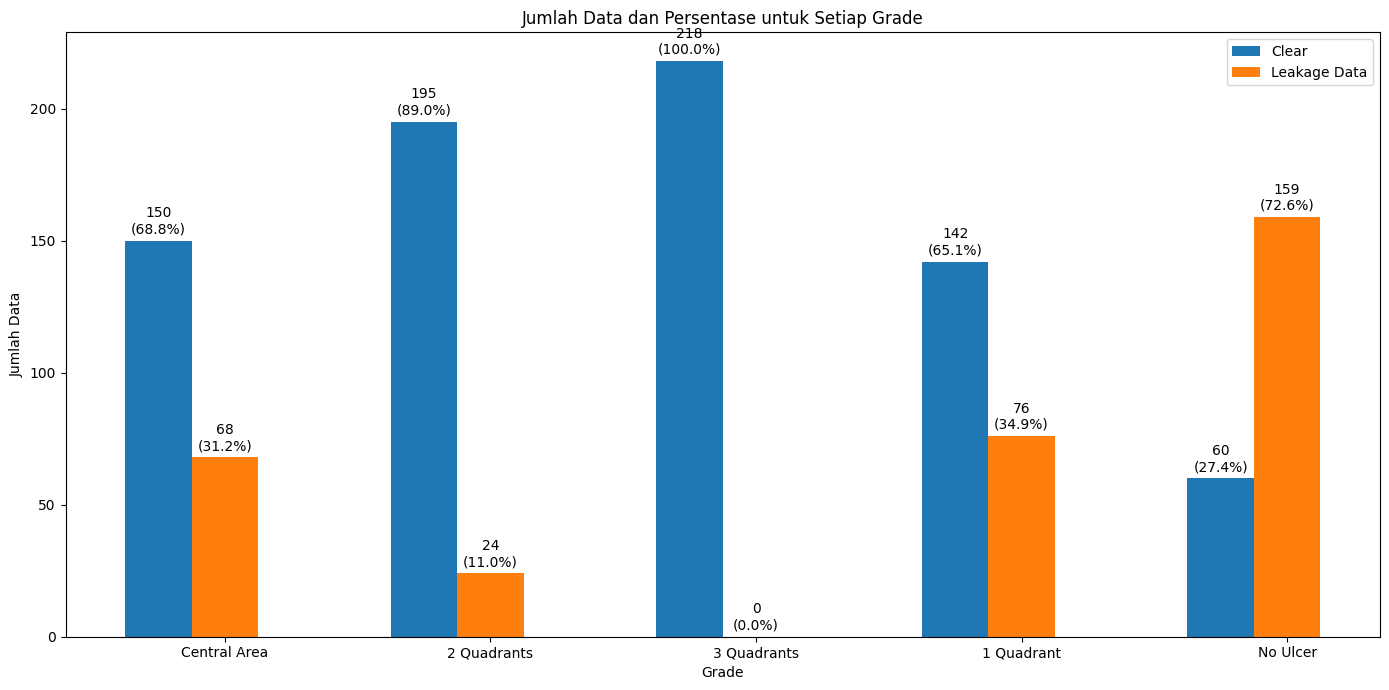

Grade      |      clear |      Leakage 
------------------------------------------
Central Area |        150 (  68.8%) |           68 (  31.2%)
2 Quadrants |        195 (  89.0%) |           24 (  11.0%)
3 Quadrants |        218 ( 100.0%) |            0 (   0.0%)
1 Quadrant |        142 (  65.1%) |           76 (  34.9%)
No Ulcer   |         60 (  27.4%) |          159 (  72.6%)


In [ ]:
print(f'Leakage and clear data validation {skenario} Masked:')

plot_kelas_leakage_distributions(clear_train_df, leakage_train_df, f'{skenario}')

In [ ]:
clear_val_df[skenario].value_counts()

,count
Grade,
3 Quadrants,55
2 Quadrants,30
Central Area,7
1 Quadrant,5


Leakage and clear data validation Grade Masked:


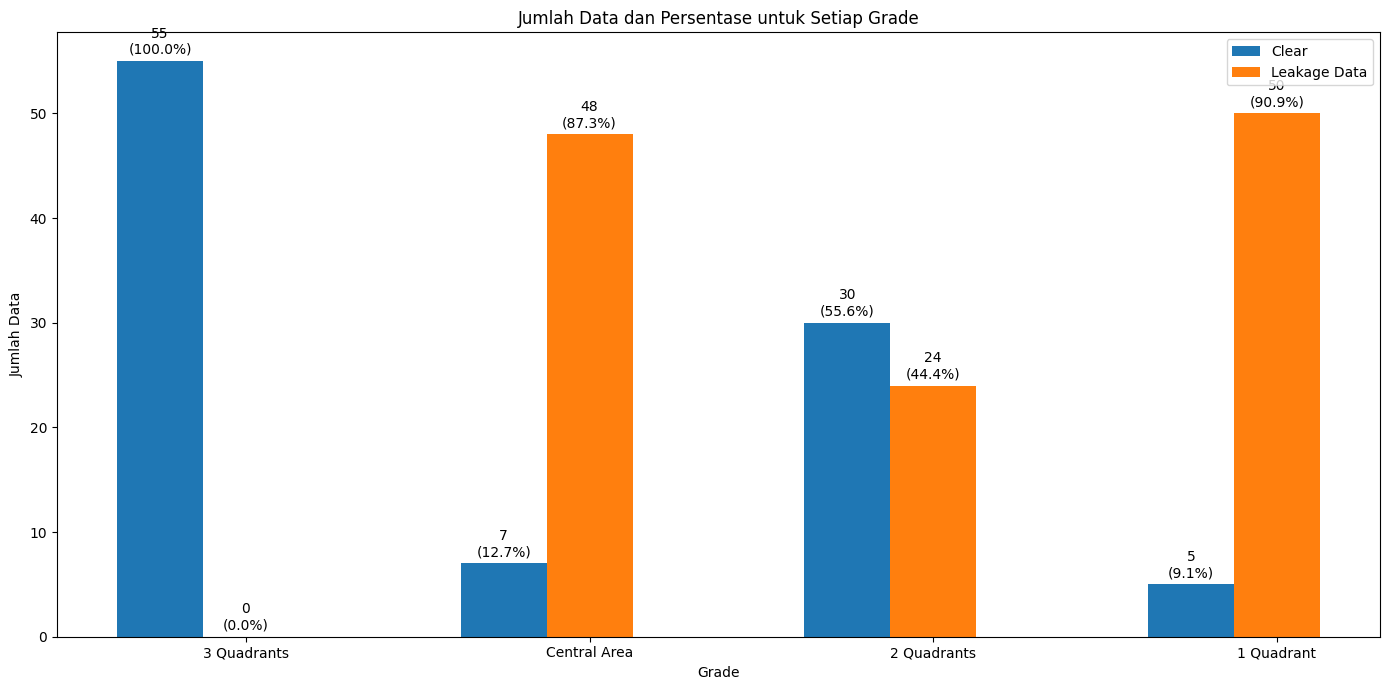

Grade      |      clear |      Leakage 
------------------------------------------
3 Quadrants |         55 ( 100.0%) |            0 (   0.0%)
Central Area |          7 (  12.7%) |           48 (  87.3%)
2 Quadrants |         30 (  55.6%) |           24 (  44.4%)
1 Quadrant |          5 (   9.1%) |           50 (  90.9%)


In [ ]:
print(f'Leakage and clear data validation {skenario} Masked:')

plot_kelas_leakage_distributions(clear_val_df, leakage_val_df, f'{skenario}')

# Evaluation

### Function

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import img_to_array
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import f1_score, recall_score, precision_score, cohen_kappa_score
import matplotlib.pyplot as plt
from google.colab import drive

!pip install keras_preprocessing --quiet
from keras_preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score, cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet_v2 import preprocess_input as preprocess_resnet50v2
from sklearn.metrics import classification_report


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.5 MB/s eta 0:00:00


In [ ]:
test_df= val_df
augment = ImageDataGenerator(

    rescale=1./255
)
# Create validation generator
test_generator = augment.flow_from_dataframe(
    dataframe=test_df,
    x_col='Url',
    y_col=skenario,
    target_size=size_img,
    class_mode='categorical',
    shuffle=False,
    seed=42,
    batch_size=32
)
train_generator = augment.flow_from_dataframe(
    dataframe=train_df,
    x_col='Url',
    y_col=skenario,
    target_size=size_img,
    class_mode='categorical',
    shuffle=False,
    seed=42,
    batch_size=32
)

print(test_generator.class_indices)
# print(test_generator.class_indices)

Found 273 validated image filenames belonging to 5 classes.
Found 1092 validated image filenames belonging to 5 classes.
{'1 Quadrant': 0, '2 Quadrants': 1, '3 Quadrants': 2, 'Central Area': 3, 'No Ulcer': 4}


In [ ]:

import tensorflow as tf


checkpoint_filepath_loss = research_folder + f'V-los_{research}.keras'

# loaded_model_acc = tf.keras.models.load_model(checkpoint_filepath_accuracy)
loaded_model_loss = tf.keras.models.load_model(checkpoint_filepath_loss)

csv_path = research_folder + f'history_{research}.csv'
History = pd.read_csv(csv_path)



### Grafik Pelatihan

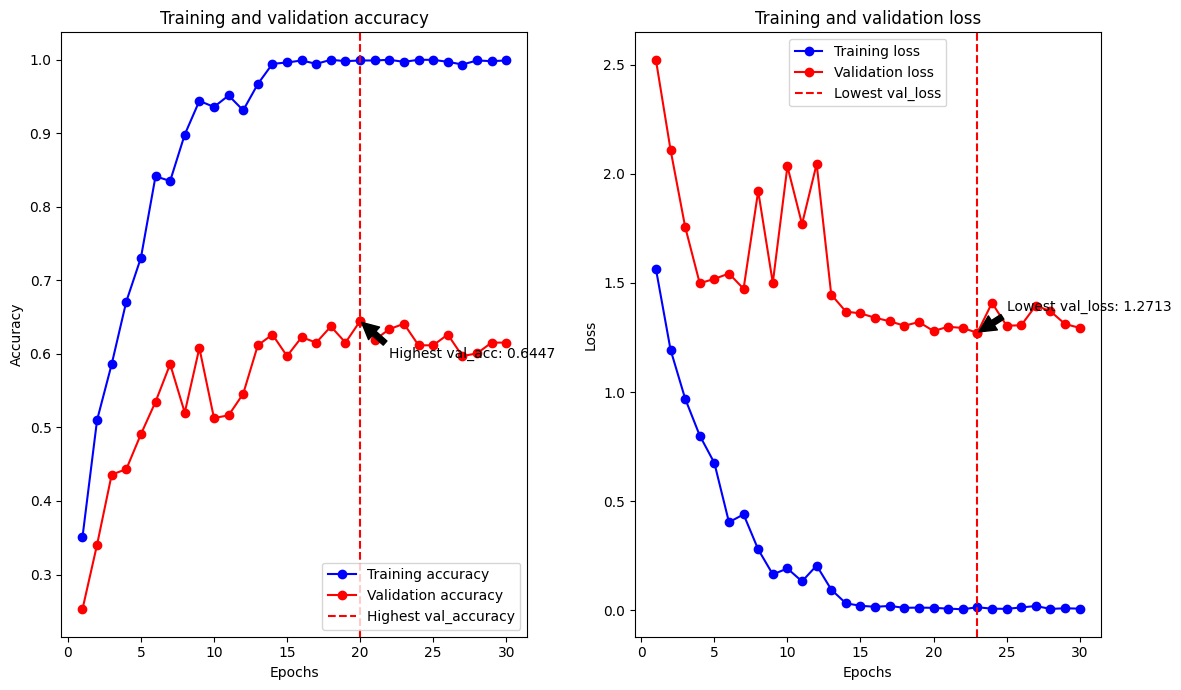

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV
# Ekstrak History akurasi dan loss dari CSV
acc = History['accuracy'].tolist()
val_acc = History['val_accuracy'].tolist()
loss = History['loss'].tolist()
val_loss = History['val_loss'].tolist()

# Range epochs
epochs = range(1, len(acc) + 1)

# Temukan titik tertinggi dan terendah untuk val_accuracy dan val_loss
max_val_acc = max(val_acc)
min_val_loss = min(val_loss)
max_val_acc_epoch = val_acc.index(max_val_acc) + 1
min_val_loss_epoch = val_loss.index(min_val_loss) + 1

# Plotting akurasi
plt.figure(figsize=(12, 7))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.axvline(max_val_acc_epoch, linestyle='--', color='r', label='Highest val_accuracy')
plt.scatter([max_val_acc_epoch], [max_val_acc], color='red')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.annotate(f'Highest val_acc: {max_val_acc:.4f}', xy=(max_val_acc_epoch, max_val_acc), xytext=(max_val_acc_epoch+2, max_val_acc-0.05),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.axvline(min_val_loss_epoch, linestyle='--', color='r', label='Lowest val_loss')
plt.scatter([min_val_loss_epoch], [min_val_loss], color='red')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.annotate(f'Lowest val_loss: {min_val_loss:.4f}', xy=(min_val_loss_epoch, min_val_loss), xytext=(min_val_loss_epoch+2, min_val_loss+0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.tight_layout()
plt.show()


## Model Predict processing

In [ ]:
import numpy as np

# Menghasilkan prediksi
predictions_prob = loaded_model_loss.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1,verbose=1)
test_loss, test_accuracy = loaded_model_loss.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size + 1,verbose=1)

# Mengambil kelas dengan probabilitas tertinggi
predict_labels = np.argmax(predictions_prob, axis=1)
true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())



9/9 ━━━━━━━━━━━━━━━━━━━━ 92s 10s/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 83s 9s/step - accuracy: 0.6538 - loss: 1.2358


In [ ]:
import numpy as np

# Menghasilkan prediksi

train_loss, train_accuracy = loaded_model_loss.evaluate(train_generator, steps=train_generator.samples // train_generator.batch_size + 1,verbose=1)




35/35 ━━━━━━━━━━━━━━━━━━━━ 314s 9s/step - accuracy: 1.0000 - loss: 0.0011


## Model Evaluate

In [ ]:
print('/nModel Evaluate Best Loss:')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')

/nModel Evaluate Best Loss:
Test Accuracy: 0.6410256624221802
Test Loss: 1.2712647914886475


In [ ]:
print('/nModel Evaluate Best Loss:')
print(f'train Accuracy: {train_accuracy  }')
print(f'train Loss: {train_loss}')


/nModel Evaluate Best Loss:
train Accuracy: 1.0
train Loss: 0.0011149776400998235


### Classification Report

In [ ]:
report = classification_report(true_labels, predict_labels, target_names=class_labels)
print("Classification Report for Model Checkpoints:")
print(report)

Classification Report for Model Checkpoints:
              precision    recall  f1-score   support

  1 Quadrant       0.56      0.64      0.60        55
 2 Quadrants       0.45      0.43      0.44        54
 3 Quadrants       0.57      0.62      0.59        55
Central Area       0.78      0.65      0.71        55
    No Ulcer       0.87      0.87      0.87        54

    accuracy                           0.64       273
   macro avg       0.65      0.64      0.64       273
weighted avg       0.65      0.64      0.64       273



### Confusion Matrix

Jumlah data : 273


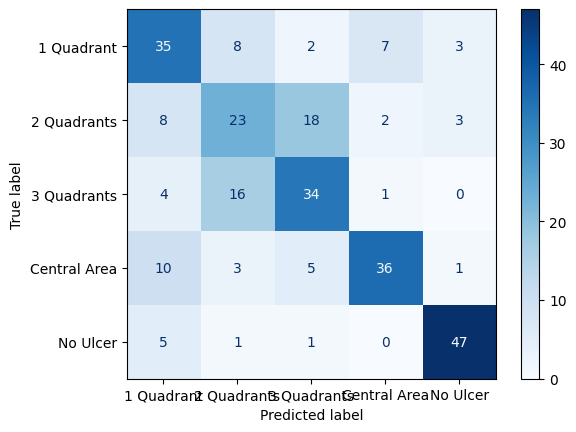

In [ ]:

# Create and display confusion matrix
cm = confusion_matrix(true_labels, predict_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap='Blues')
disp.figure_.savefig(research_folder+f'CM_{research}_.png')  # Save confusion matrix to a file
print('Jumlah data :', test_df.shape[0])

In [ ]:
kappa = cohen_kappa_score(true_labels, predict_labels)
print(f'Kappa: {kappa}')

Kappa: 0.5512504402958789


### AUC

In [ ]:
from sklearn.metrics import roc_auc_score
import numpy as np

class_names = list(test_generator.class_indices.keys())

# List untuk menyimpan AUC per pasangan
auc_scores = []

# Loop untuk setiap pasangan kelas
for i in range(len(class_names)):
    for j in range(i + 1, len(class_names)):
        class1 = class_names[i]
        class2 = class_names[j]

        # Filter data untuk kedua kelas ini
        filtered_df = test_df[test_df[skenario].isin([class1, class2])]

        # Membuat generator untuk pasangan kelas ini
        generator = augment.flow_from_dataframe(
            dataframe=filtered_df,
            x_col='Url',
            y_col=skenario,
            target_size=size_img,
            class_mode='categorical',
            shuffle=False,
            seed=42,
            batch_size=32
        )

        # Prediksi probabilitas untuk kedua kelas
        predictions_prob = loaded_model_loss.predict(generator, steps=generator.samples // generator.batch_size + 1,verbose=1)

        # Mendapatkan label sebenarnya
        y_true = generator.classes

        # Mengonversi label ke one-hot encoding
        y_true_bin = np.eye(2)[y_true]  # Karena hanya ada dua kelas

        # Select probabilities only for the two classes being compared
        relevant_predictions_prob = predictions_prob[:, [test_generator.class_indices[class1], test_generator.class_indices[class2]]]

        # Menghitung AUC Score untuk pasangan ini
        auc_score = roc_auc_score(y_true_bin, relevant_predictions_prob,  multi_class='ovo')
        auc_scores.append({
            'pair': (class1, class2),
            'auc_score': auc_score
        })

# Menampilkan hasil
print('-------------------------------------------')
print("AUC Scores per Pair:")
for score in auc_scores:
    print(f"Pair: {score['pair']}, AUC Score: {score['auc_score']}")

Found 109 validated image filenames belonging to 2 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 38s 8s/step
Found 110 validated image filenames belonging to 2 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 33s 8s/step
Found 110 validated image filenames belonging to 2 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 31s 7s/step
Found 109 validated image filenames belonging to 2 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 31s 7s/step
Found 109 validated image filenames belonging to 2 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 29s 7s/step
Found 109 validated image filenames belonging to 2 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 29s 7s/step
Found 108 validated image filenames belonging to 2 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 31s 7s/step
Found 110 validated image filenames belonging to 2 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 35s 9s/step
Found 109 validated image filenames belonging to 2 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 35s 8s/step
Found 109 validated image filenames belonging to 2 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 32s 8s/step
------------------------------